# Анализ лояльности пользователей Яндекс Афиши

- Автор: Оливия Щербакова
- Дата: 

### Цели и задачи проекта

**Цель:** Провести исследовательский анализ данных, чтобы понять, какие пользователи с большей вероятностью возвращаются на платформу и делают заказы повторно. Это позволит:
- Быстро выявлять перспективных клиентов и предлагать им персонализированные условия.
- Точно настраивать рекламу на аудитории с высокой вероятностью возврата.
- Оптимизировать маркетинговые бюджеты.
- Повысить общий уровень удержания клиентов.

**Задачи:**  
1. Загрузить данные и ознакомиться с ними.
2. Провести предобработку данных.
3. Создание профиля пользователя.
4. Провести исследовательский анализ данных.
5. Общие выводы и рекомендации.

### Описание данных

Для анализа данных предоставлены данные о сервисе Яндекс Афиша. База данных data-analyst-afisha:
- `data-analyst-afisha` - содержит данные Яндекс Афиши о мероприятиях в разных городах и клиентов сервиса.

**Описание датасета `df_afisha`:**
- `user_id` — уникальный идентификатор пользователя, совершившего заказ;
- `device_type_canonical` — тип устройства, с которого был оформлен заказ (`mobile` — мобильные устройства, `desktop` — стационарные);
- `order_id` — уникальный идентификатор заказа;
- `order_dt` — дата создания заказа (используйте данные `created_dt_msk`);
- `order_ts` — дата и время создания заказа (используйте данные `created_ts_msk`);
- `currency_code` — валюта оплаты;
- `revenue` — выручка от заказа;
- `tickets_count` — количество купленных билетов;
- `days_since_prev` — количество дней от предыдущей покупки пользователя, для пользователей с одной покупкой — значение пропущено;
- `event_id` — уникальный идентификатор мероприятия;
- `service_name` — название билетного оператора;
- `event_type_main` — основной тип мероприятия (театральная постановка, концерт и так далее);
- `region_name` — название региона, в котором прошло мероприятие;
- `city_name` — название города, в котором прошло мероприятие.

### Содержимое проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговый вывод и рекомендации.
---

## Этапы выполнения проекта

### 1. Загрузка данных и их предобработка

---

**Задача 1.1:** Напишите SQL-запрос, выгружающий в датафрейм pandas необходимые данные. Используйте следующие параметры для подключения к базе данных `data-analyst-afisha`:

- **Хост** — `rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net`
- **База данных** — `data-analyst-afisha`
- **Порт** — `6432`
- **Аутентификация** — `Database Native`
- **Пользователь** — `praktikum_student`
- **Пароль** — `Sdf4$2;d-d30pp`

Для выгрузки используйте запрос из предыдущего урока и библиотеку SQLAlchemy.

Выгрузка из базы данных SQL должна позволить собрать следующие данные:

- `user_id` — уникальный идентификатор пользователя, совершившего заказ;
- `device_type_canonical` — тип устройства, с которого был оформлен заказ (`mobile` — мобильные устройства, `desktop` — стационарные);
- `order_id` — уникальный идентификатор заказа;
- `order_dt` — дата создания заказа (используйте данные `created_dt_msk`);
- `order_ts` — дата и время создания заказа (используйте данные `created_ts_msk`);
- `currency_code` — валюта оплаты;
- `revenue` — выручка от заказа;
- `tickets_count` — количество купленных билетов;
- `days_since_prev` — количество дней от предыдущей покупки пользователя, для пользователей с одной покупкой — значение пропущено;
- `event_id` — уникальный идентификатор мероприятия;
- `service_name` — название билетного оператора;
- `event_type_main` — основной тип мероприятия (театральная постановка, концерт и так далее);
- `region_name` — название региона, в котором прошло мероприятие;
- `city_name` — название города, в котором прошло мероприятие.

---


In [2]:
#Команда для установки SQLAlchemy
!pip install sqlalchemy

In [3]:
#Установка модуля psycopg2
!pip install psycopg2-binary

     |████████████████████████████████| 3.8 MB 911 kB/s eta 0:00:01


In [4]:
!pip install phik

  Using cached phik-0.12.5-cp39-cp39-macosx_10_13_x86_64.whl (669 kB)


In [ ]:
#Импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine #функция create_engine() из библиотеки SQLAlchemy для подключения к базе данных и выполнения SQL-запроса

#Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

#Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [1]:
!pip install python_dotenv

In [2]:
import os 
from dotenv import load_dotenv

load_dotenv()

#Данные для подключения к базе данных
df_config = {'user': os.getenv('DB_USER'), # имя пользователя
             'pwd': os.getenv('DB_PASSWORD'), # пароль
             'host': os.getenv('DB_HOST'),
             'port': int(os.getenv('DB_PORT')), # порт подключения
             'db': os.getenv('DB_NAME') # название базы данных
             }

In [3]:
#Строка для подключения к базе данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

NameError: name 'db_config' is not defined

In [7]:
engine = create_engine(connection_string)

In [8]:
#Запишем запрос в переменную query
query = '''
WITH set_config_precode AS (
  SELECT set_config('synchronize_seqscans', 'off', true)
)
SELECT 
  p.user_id,
  p.device_type_canonical,
  p.order_id,
  p.created_dt_msk AS order_dt,
  p.created_ts_msk AS order_ts,
  p.currency_code,
  p.revenue,
  p.tickets_count,
  p.created_dt_msk :: date 
    - LAG(p.created_dt_msk :: date) OVER(
    PARTITION BY p.user_id 
    ORDER BY p.created_dt_msk) AS days_since_prev,
  p.event_id,
  p.service_name,
  e.event_type_main,
  r.region_name,
  c.city_name
FROM afisha.purchases AS p
INNER JOIN afisha.events AS e USING(event_id)
INNER JOIN afisha.city AS c USING(city_id)
INNER JOIN afisha.regions AS r USING(region_id)
WHERE 
  device_type_canonical IN ('mobile', 'desktop')
  AND event_type_main != 'фильм'
ORDER BY user_id ASC
'''

In [9]:
#Результат выдачи SQL-запроса 
df_afisha = pd.read_sql_query(query, con=engine)

---

**Задача 1.2:** Изучите общую информацию о выгруженных данных. Оцените корректность выгрузки и объём полученных данных.

Предположите, какие шаги необходимо сделать на стадии предобработки данных — например, скорректировать типы данных.

Зафиксируйте основную информацию о данных в кратком промежуточном выводе.

---

Познакомимся с данными из базы данных `data-analyst-afisha`

In [10]:
df_afisha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  service_name           290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  region_name            290611 non-null  obje

In [11]:
#Выведем первый строки
df_afisha.head()

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,service_name,event_type_main,region_name,city_name
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,Край билетов,театр,Каменевский регион,Глиногорск
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,Мой билет,выставки,Каменевский регион,Глиногорск
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,За билетом!,другое,Каменевский регион,Глиногорск
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,Лови билет!,другое,Североярская область,Озёрск
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,Билеты без проблем,стендап,Озернинский край,Родниковецк


Датасет `df_afisha` содержит 290611 строк и 14 столбцов, в которых предоставлена информация о мероприятиях и клиентах сервиса Яндекс Афиша. 
Изучим данные:
- **Строковые данные (object)**. Семь столбцов:
    - `user_id`, `device_type_canonical`, `currency_code`, `service_name`, `event_type_main`, `region_name`, `city_name` представлены в строковом формате, поэтому тип данных корректен.
- **Числовые значения с плавающей запятой (float64)**. Два столбца:
    - `revenue` содержит дробную информацию о выручке с заказов, поэтому данный формат подобран корректно.
    - `days_since_prev` содержит информацию о количестве дней от предыдущей покупки пользователя, необходимо сменить тип на `int64`.
- **Целочисленные данные (int64)**. Три столбца:
    - `order_id`, `event_id` хранят уникальные идентификаторы зказов и мероприятий соответственно,  поэтому тип данных используется корректно.
    - `tickets_count` хранит количество купленных билетов, необходимо оптимизировать тип данных с понижением размерности целочисленных данных.
- **Тип данных даты и времени (datetime64[ns])**. Два столбца:
    - `order_dt` содержат инфомацию о дате создания заказа, тип данных можно оптимизировать, уменьшив точность данных, так как нам необходима только  дата. 
    - `order_ts` содержат инфомацию о дате и времени создания заказа соответсвенно, тип данных корректен.
    
Названия столбцов указаны корректно и имеют один вид.

Все значения в столбцах соответствуют своему описанию данных.

---

###  2. Предобработка данных

Выполните все стандартные действия по предобработке данных:

---

**Задача 2.1:** Данные о выручке сервиса представлены в российских рублях и казахстанских тенге. Приведите выручку к единой валюте — российскому рублю.

Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю за 2024 год — `final_tickets_tenge_df.csv`. Его можно загрузить по пути `https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')`

Значения в рублях представлено для 100 тенге.

Результаты преобразования сохраните в новый столбец `revenue_rub`.

---


In [12]:
#Загрузим датасет 'final_tickets_tenge_df.csv'
kzt_rate = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

In [13]:
kzt_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


In [14]:
#Приведём дату в датасете final_tickets_tenge_df.csv к нужному типу
kzt_rate['data'] = pd.to_datetime(kzt_rate['data'])

In [15]:
#Объеденим датасеты
df_afisha = pd.merge(df_afisha, kzt_rate, left_on = 'order_dt', right_on = 'data', how =  'left')

In [16]:
#Создадим функцию для перевода валюты по курсу
def kzt_to_rub(row):
    if row['currency_code'] == 'kzt':
        return row['revenue'] / row['nominal'] * row['curs']
    else:
        return row['revenue']
    
#Используем функцию 
df_afisha['revenue_rub'] = df_afisha.apply(kzt_to_rub, axis = 1)

In [17]:
#Удалим лишние столбцы из датафрейма df_afisha
df_afisha = df_afisha.drop(columns = kzt_rate.columns)

In [18]:
df_afisha.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290610
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  service_name           290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  region_name            290611 non-null  obje

---

**Задача 2.2:**

- Проверьте данные на пропущенные значения. Если выгрузка из SQL была успешной, то пропуски должны быть только в столбце `days_since_prev`.
- Преобразуйте типы данных в некоторых столбцах, если это необходимо. Обратите внимание на данные с датой и временем, а также на числовые данные, размерность которых можно сократить.
- Изучите значения в ключевых столбцах. Обработайте ошибки, если обнаружите их.
    - Проверьте, какие категории указаны в столбцах с номинальными данными. Есть ли среди категорий такие, что обозначают пропуски в данных или отсутствие информации? Проведите нормализацию данных, если это необходимо.
    - Проверьте распределение численных данных и наличие в них выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха.
        
        Важные показатели в рамках поставленной задачи — это выручка с заказа (`revenue_rub`) и количество билетов в заказе (`tickets_count`), поэтому в первую очередь проверьте данные в этих столбцах.
        
        Если обнаружите выбросы в поле `revenue_rub`, то отфильтруйте значения по 99 перцентилю.

После предобработки проверьте, были ли отфильтрованы данные. Если были, то оцените, в каком объёме. Сформулируйте промежуточный вывод, зафиксировав основные действия и описания новых столбцов.

---

In [19]:
ininstal_row = df_afisha.shape[0]

In [20]:
df_afisha.isna().sum().sort_values()

user_id                      0
device_type_canonical        0
order_id                     0
order_dt                     0
order_ts                     0
currency_code                0
revenue                      0
tickets_count                0
event_id                     0
service_name                 0
event_type_main              0
region_name                  0
city_name                    0
revenue_rub                  0
days_since_prev          21933
dtype: int64

In [21]:
(df_afisha.isna().mean() * 100).sort_values()

user_id                  0.000000
device_type_canonical    0.000000
order_id                 0.000000
order_dt                 0.000000
order_ts                 0.000000
currency_code            0.000000
revenue                  0.000000
tickets_count            0.000000
event_id                 0.000000
service_name             0.000000
event_type_main          0.000000
region_name              0.000000
city_name                0.000000
revenue_rub              0.000000
days_since_prev          7.547202
dtype: float64

Всего столбцов с пропущенными значениями 1 из 15: `days_since_prev`.

- `days_since_prev`- 21933 (7%). Отсутсвие данных о количестве дней от предыдущей покупки пользователя может быть из-за того, что пользователь совершил только одну покупку на сервисе.  

В остальных данных могут присутствовать значения-индикаторы, которые также будут указывать на отсутствие данных.

In [22]:
#Оптимизируем целочисленный тип данных в датафрейме df_afisha
df_afisha['tickets_count'] = pd.to_numeric(df_afisha['tickets_count'], downcast = 'integer')

In [23]:
df_afisha['order_dt'] = df_afisha['order_dt'].astype('datetime64[D]')

Для оптимизации работы с данными в датафрейме были сделаны такие изменения типов данных:

- `tickets_count` - int8
- `order_dt` - используется datetime64[ns] с меньшей точностью

Проверим данные на явные дубликаты.

In [24]:
df_afisha.duplicated().sum()

0

В датафреймах нет явных дубликатов строк. Проверим неявные дубликаты — значения по order_id заказа, которые должны быть уникальными.

In [25]:
df_afisha.duplicated(subset='order_id').sum()

0

Все идентификаторы заказов являются уникальными.

In [26]:
for column in ['device_type_canonical', 'service_name', 'event_type_main', 'region_name', 'city_name']:
    display(f'Уникальные значения в столбце {column}')
    display(df_afisha[column].sort_values().unique())

'Уникальные значения в столбце device_type_canonical'

array(['desktop', 'mobile'], dtype=object)

'Уникальные значения в столбце service_name'

array(['Crazy ticket!', 'Show_ticket', 'Билет по телефону',
       'Билеты без проблем', 'Билеты в интернете', 'Билеты в руки',
       'Быстробилет', 'Быстрый кассир', 'Весь в билетах', 'Восьмёрка',
       'Вперёд!', 'Выступления.ру', 'Городской дом культуры',
       'Дом культуры', 'Дырокол', 'За билетом!', 'Зе Бест!', 'КарандашРУ',
       'Кино билет', 'Край билетов', 'Лимоны', 'Лови билет!',
       'Лучшие билеты', 'Мир касс', 'Мой билет', 'Облачко', 'Прачечная',
       'Радио ticket', 'Реестр', 'Росбилет', 'Тебе билет!', 'Телебилет',
       'Тех билет', 'Цвет и билет', 'Шоу начинается!', 'Яблоко'],
      dtype=object)

'Уникальные значения в столбце event_type_main'

array(['выставки', 'другое', 'концерты', 'спорт', 'стендап', 'театр',
       'ёлки'], dtype=object)

'Уникальные значения в столбце region_name'

array(['Белоярская область', 'Берестовский округ', 'Берёзовская область',
       'Боровлянский край', 'Верховинская область', 'Верхозёрский край',
       'Верхоречная область', 'Ветренский регион', 'Вишнёвский край',
       'Глиногорская область', 'Голубевский округ',
       'Горицветская область', 'Горноземский регион',
       'Горностепной регион', 'Дальнеземская область',
       'Дальнезорский край', 'Дубравная область', 'Залесский край',
       'Заречная область', 'Зеленоградский округ', 'Златопольский округ',
       'Золотоключевской край', 'Зоринский регион', 'Каменевский регион',
       'Каменичская область', 'Каменноозёрный край', 'Каменноярский край',
       'Каменополянский округ', 'Ключеводский округ',
       'Кристаловская область', 'Кристальная область',
       'Крутоводская область', 'Крутоводский регион', 'Лесноярский край',
       'Лесодальний край', 'Лесополянская область', 'Лесостепной край',
       'Лесоярская область', 'Луговая область', 'Лугоградская область',
    

'Уникальные значения в столбце city_name'

array(['Айкольск', 'Айсуак', 'Акбастау', 'Акбасты', 'Акжолтау',
       'Алтынкала', 'Алтынсай', 'Байкуль', 'Байсары', 'Байтерековск',
       'Беловодск', 'Белоярск', 'Бережанка', 'Бережанск', 'Березиногорск',
       'Березиноск', 'Березовцево', 'Берестовец', 'Берестяград',
       'Берёзиново', 'Берёзовка', 'Берёзогорск', 'Берёзодальн',
       'Берёзополье', 'Берёзореч', 'Берёзоречье', 'Бозарык', 'Боровлянск',
       'Буркиттау', 'Бурьяново', 'Верховино', 'Верховка', 'Верхозолотск',
       'Верхозорье', 'Верхоозёров', 'Ветеринск', 'Вишнёво',
       'Вишнёвогорск', 'Вишнёводск', 'Водниково', 'Глиногорск',
       'Глиногорь', 'Глиноград', 'Глинозолото', 'Глинозорь', 'Глинолес',
       'Глинополин', 'Глинополье', 'Глинополянск', 'Глинореч', 'Глинянск',
       'Голубевск', 'Голубино', 'Гореловск', 'Горицветск', 'Горноград',
       'Горнодолинск', 'Горнолесье', 'Горнолуг', 'Горнополец',
       'Горнополье', 'Горнополянск', 'Горнополяровск', 'Горнополёк',
       'Горноставинск', 'Горяново', '

Не было выявлено дубликатов при анализе столбцов:  `device_type_canonical`, `service_name`, `event_type_main`, `region_name`, `city_name`

Проверим расределение численных данных и наличие в них выбросов.

In [27]:
#Изучим статистические показатели столбца tickets_count
display('Статистические показатели столбца tickets_count:')
df_afisha['tickets_count'].describe()

'Статистические показатели столбца tickets_count:'

count    290611.000000
mean          2.754311
std           1.170620
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          57.000000
Name: tickets_count, dtype: float64

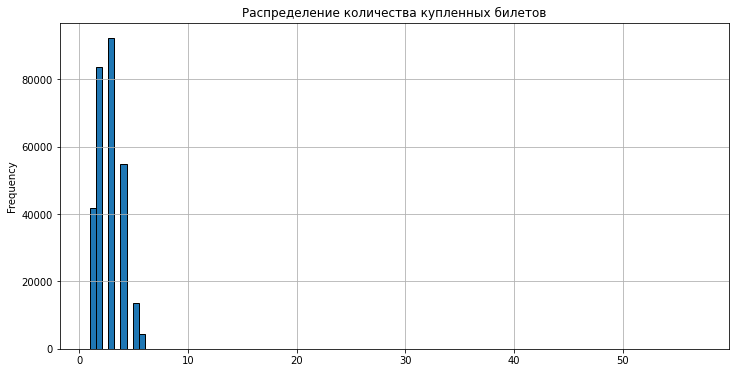

In [28]:
#Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12,6))

#Строим гистограмму
df_afisha['tickets_count'].plot(
    kind = 'hist',
    bins = 100,
    edgecolor = 'black',
    rot = 0,
    title  = 'Распределение количества купленных билетов',
    xlabel = 'Количество билетов',
    ylabel = 'Частота'

)

#Добавляем сетку графика
plt.grid()

#Выводим график
plt.show()

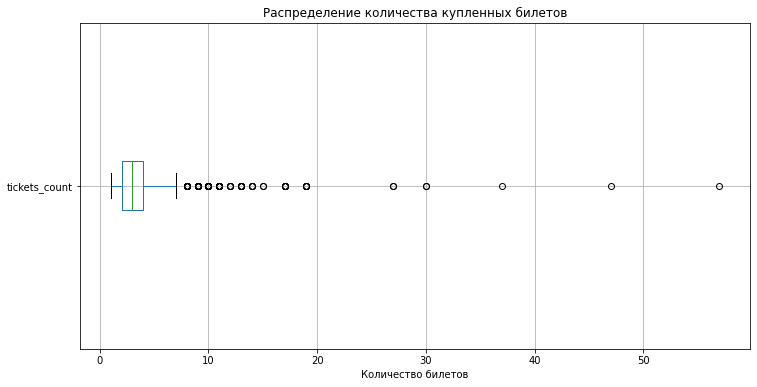

In [29]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize = (12,6))

# Строим диаграмму размаха значений  
df_afisha.boxplot(column = 'tickets_count', vert = False)

# Добавляем заголовок и метки оси
plt.title('Распределение количества купленных билетов')
plt.xlabel('Количество билетов')


# Выводим график
plt.show()

По гистограмме видно, что данные распределены асимметрично и имеет правый хвост. Видно, что присутствуют высокие значения, которые оттягивают распределение вправо. Такие значения могут быть, если билеты покупались для большой компании, также для учебных заведений.  

Выше чем 4 билеты не часто покупают, что видно по диаграмме размаха, после 4 начинаются выбросы, которые доходят до 57. Максимальное значение на много выше, чем среднее и медиана.

In [30]:
df_afisha.loc[df_afisha['tickets_count'] > 4]['tickets_count'].value_counts()

5     13476
6      4283
7        62
9        38
8        21
10       19
11       13
13        7
17        6
19        5
12        4
14        4
27        2
30        2
15        2
57        1
37        1
47        1
Name: tickets_count, dtype: int64

Можно заметить, что больше 7 билетов покупают очень редко относительно остальных, что выглядит как выбросы.

In [31]:
#Изучим статистические показатели столбца revenue_rub
display('Статистические показатели столбца revenue_rub:')
df_afisha['revenue_rub'].describe()

'Статистические показатели столбца revenue_rub:'

count    290611.000000
mean        555.571987
std         875.498172
min         -90.760000
25%         113.970000
50%         351.140000
75%         802.050000
max       81174.540000
Name: revenue_rub, dtype: float64

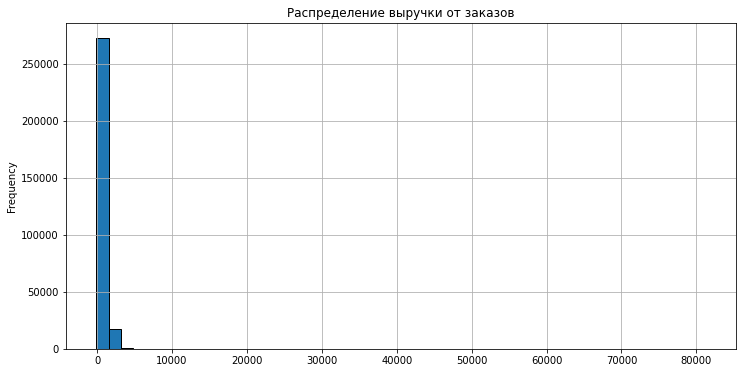

In [32]:
#Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12,6))

#Строим гистограмму
df_afisha['revenue_rub'].plot(
    kind = 'hist',
    bins = 50,
    edgecolor = 'black',
    rot = 0,
    title  = 'Распределение выручки от заказов',
    xlabel = 'Выручка(руб)',
    ylabel = 'Частота'

)

#Добавляем сетку графика
plt.grid()

#Выводим график
plt.show()

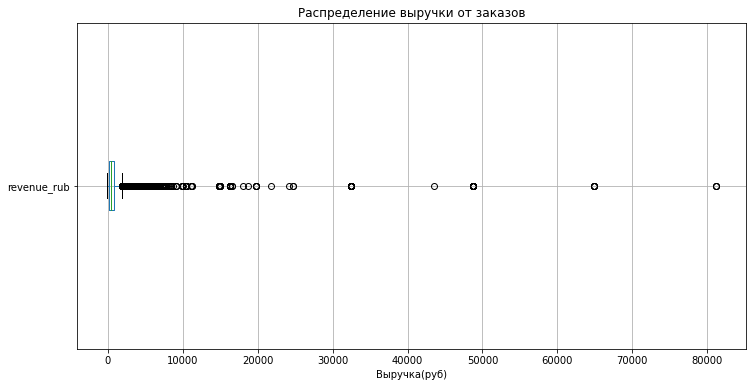

In [33]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize = (12,6))

# Строим диаграмму размаха значений  
df_afisha.boxplot(column = 'revenue_rub', vert = False)

# Добавляем заголовок и метки оси
plt.title('Распределение выручки от заказов')
plt.xlabel('Выручка(руб)')


# Выводим график
plt.show()

По гистограмме видно, что данные распределены асимметрично и имеет правый хвост. Видно, что присутствуют высокие значения, которые оттягивают распределение вправо. Среднее значение выше медианы, что также говорит о наличии положительных выбросов. Такие значения могут быть как раз таки во время покупок большого количества билетов, так как их тоже редко покупают. 

Выше чем 802 рубля встречается уже реже, но всё таки скопление больше, чем после 10.000 рублей, которые уже выглядят аномально. 

In [34]:
df_afisha.loc[df_afisha['revenue_rub'] > 10000]['revenue_rub'].value_counts()

32469.82    25
48704.72    19
10396.02    10
16234.91     8
14913.53     5
14808.53     5
64939.63     5
19744.71     4
81174.54     3
16617.94     2
11078.63     2
11185.15     2
24680.88     2
21757.54     1
18093.64     1
24124.85     1
43515.08     1
18641.92     1
Name: revenue_rub, dtype: int64

Действительно, выручка от заказа выше 10000 встречается редко, поэтому такие значения можно считать выбросами.  
Отфильтруем значения в `revenue_rub` по 99 перцентилю.

In [35]:
#Находим 99-й процентиль
outliers = df_afisha['revenue_rub'].quantile(0.99)

#Отбираем данные, оставляя только значения меньше найденого порога
df_afisha = df_afisha[df_afisha['revenue_rub'] <= outliers]

#Выведем рузультат после фильтрации
df_afisha['revenue_rub'].describe()

count    287786.000000
mean        518.029224
std         511.963780
min         -90.760000
25%         111.850000
50%         343.850000
75%         788.660000
max        2628.421739
Name: revenue_rub, dtype: float64

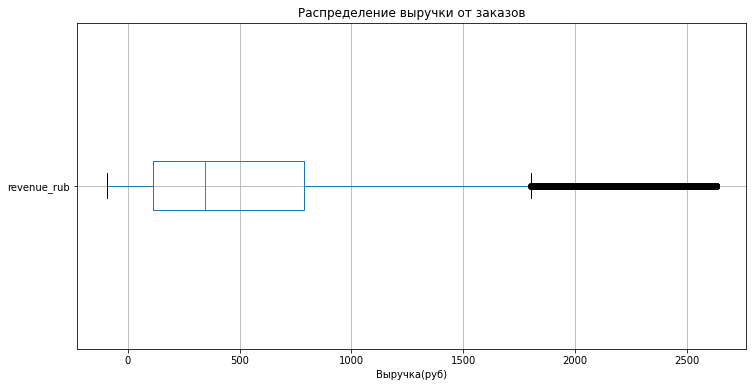

In [36]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize = (12,6))

# Строим диаграмму размаха значений  
df_afisha.boxplot(column = 'revenue_rub', vert = False)

# Добавляем заголовок и метки оси
plt.title('Распределение выручки от заказов')
plt.xlabel('Выручка(руб)')


# Выводим график
plt.show()

После фильтрации было удалены значения, которые являлись выбросами в столбце `revenue_rub`. По диаграмме разбросам можно теперь заметить, что выручка от заказа выше 2100 аномальна. 

In [37]:
final_row_counts = df_afisha.shape[0]

In [38]:
quantity_row_counts = ininstal_row - final_row_counts

relative_value = round(quantity_row_counts / ininstal_row  * 100, 2)

In [39]:
display('Всего было строк', ininstal_row)
display('Количество удаленный строк', quantity_row_counts)
display('Количество строк после удаления дубликатов и удаления пропусков', final_row_counts)
display('Относительное количество удаленных строк', relative_value)

'Всего было строк'

290611

'Количество удаленный строк'

2825

'Количество строк после удаления дубликатов и удаления пропусков'

287786

'Относительное количество удаленных строк'

0.97

После проведения предобработки данных в датафрейме 15 столбоцов было 14, 287786 строк из 290611. 
Дубликаты не были найдены.  Строки были отфильтрованы по выбросам в столбце `revenue_rub`.

Для оптимизации работы с данными в датафрейме были сделаны такие изменения типов данных:
- `tickets_count` - int8
- `order_dt` - используется datetime64[ns] с меньшей точностью

Всего было обнаружено столбцов с пропущенными значениями 1 из 15: `days_since_prev`. 

 - `days_since_prev`- 21933 (7%). Отсутсвие данных о количестве дней от предыдущей покупки пользователя может быть из-за того, что пользователь совершил только одну покупку на сервисе.  

Чтобы не было искажений в данных пропуски не заполнялись.

Данные были проверены на явные и неявные дубликаты - в данных они не были обнаружены.

Также были добавлены новые столбцы в датафрейм:
- `revenue_rub` - выручка от заказа в российских рублях.

Был проведен анализ на выбросы в столбцах: `tickets_count` и `revenue_rub`. После чего данные были отфильрованы по обнаруженным выбросам в поле `revenue_rub`.

---

### 3. Создание профиля пользователя

В будущем отдел маркетинга планирует создать модель для прогнозирования возврата пользователей. Поэтому сейчас они просят вас построить агрегированные признаки, описывающие поведение и профиль каждого пользователя.

---

**Задача 3.1.** Постройте профиль пользователя — для каждого пользователя найдите:

- дату первого и последнего заказа;
- устройство, с которого был сделан первый заказ;
- регион, в котором был сделан первый заказ;
- билетного партнёра, к которому обращались при первом заказе;
- жанр первого посещённого мероприятия (используйте поле `event_type_main`);
- общее количество заказов;
- средняя выручка с одного заказа в рублях;
- среднее количество билетов в заказе;
- среднее время между заказами.

После этого добавьте два бинарных признака:

- `is_two` — совершил ли пользователь 2 и более заказа;
- `is_five` — совершил ли пользователь 5 и более заказов.

**Рекомендация:** перед тем как строить профиль, отсортируйте данные по времени совершения заказа.

---


In [40]:
#Отсортируем данные по времени совершения заказа каждого пользователя
df_afisha = df_afisha.sort_values(['user_id', 'order_ts'])

In [41]:
profile = df_afisha.groupby('user_id').agg(
    first_order_ts = ('order_ts','min'),
    last_order_ts = ('order_ts', 'max'),
    order_count = ('order_id', 'nunique'),
    avg_revenue_rub = ('revenue_rub', 'mean'),
    avg_tickets_count = ('tickets_count', 'mean'),
    avg_days_since_prev = ('days_since_prev', 'mean')
).reset_index()

In [42]:
#Найдем строку с первым заказом каждого пользователя
first_orders = df_afisha.drop_duplicates(subset = 'user_id', keep = 'first')

In [43]:
#Возьмем необходимые строки первых заказов пользователей
first_orders_profile = first_orders[[
    'user_id', 
    'device_type_canonical', 
    'region_name', 
    'service_name', 
    'event_type_main']].rename(columns = {
    'device_type_canonical' : 'first_device_type',
    'region_name' : 'first_region_name',
    'service_name' : 'first_service_name',
    'event_type_main'  : 'first_event_type'
})

In [44]:
#Соберём профиль пользователя
user_profile = first_orders_profile.merge(profile, on = 'user_id')

In [45]:
#Добавляем бинарный признак is_two
user_profile['is_two'] = (user_profile['order_count'] >= 2).astype(int)

In [46]:
#Добавляем бинарный признак is_five
user_profile['is_five'] = (user_profile['order_count'] >= 5).astype(int)

In [47]:
ininstal_row_profile = user_profile.shape[0]

---

**Задача 3.2.** Прежде чем проводить исследовательский анализ данных и делать выводы, важно понять, с какими данными вы работаете: насколько они репрезентативны и нет ли в них аномалий.

Используя данные о профилях пользователей, рассчитайте:

- общее число пользователей в выборке;
- среднюю выручку с одного заказа;
- долю пользователей, совершивших 2 и более заказа;
- долю пользователей, совершивших 5 и более заказов.

Также изучите статистические показатели:

- по общему числу заказов;
- по среднему числу билетов в заказе;
- по среднему количеству дней между покупками.

По результатам оцените данные: достаточно ли их по объёму, есть ли аномальные значения в данных о количестве заказов и среднем количестве билетов?

Если вы найдёте аномальные значения, опишите их и примите обоснованное решение о том, как с ними поступить:

- Оставить и учитывать их при анализе?
- Отфильтровать данные по какому-то значению, например, по 95-му или 99-му перцентилю?

Если вы проведёте фильтрацию, то вычислите объём отфильтрованных данных и выведите статистические показатели по обновлённому датасету.

In [48]:
display('Общее число пользователей в выборке:')
user_profile['user_id'].nunique()

'Общее число пользователей в выборке:'

21854

In [49]:
display('Средняя выручка с одного заказа:')
round(user_profile['avg_revenue_rub'].mean(), 2)

'Средняя выручка с одного заказа:'

544.4

In [50]:
relative_is_two = user_profile['is_two'].mean()
display(f'Доля пользователей совершивших 2 и более заказа: {relative_is_two:.2f}')

'Доля пользователей совершивших 2 и более заказа: 0.62'

In [51]:
relative_is_five = user_profile['is_five'].mean()
display(f'Доля пользователей совершивших 5 и более заказа: {relative_is_five:.2f}')

'Доля пользователей совершивших 5 и более заказа: 0.29'

In [52]:
display('Статистические показатели по общему числу заказов:')
user_profile['order_count'].describe()

'Статистические показатели по общему числу заказов:'

count    21854.000000
mean        13.168573
std        121.674800
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max      10181.000000
Name: order_count, dtype: float64

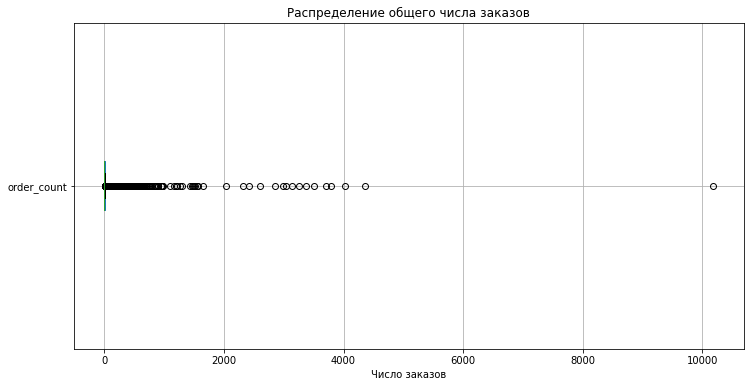

In [53]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize = (12,6))

# Строим диаграмму размаха значений  
user_profile.boxplot(column = 'order_count', vert = False)

# Добавляем заголовок и метки оси
plt.title('Распределение общего числа заказов')
plt.xlabel('Число заказов')


# Выводим график
plt.show()

По диаграмме распределения можно заметить, что присутсвует много выбросов. Также значение медианы ниже среднего значения почти в 7 раз, что также подтверждает наличие положительных выбросов. Максимальное значение - 10181 в разы выше среднего значения, что выглядит, как аномалия в данных. 

В среднем у пользователей - по 2 заказа за весь период.


Данные лучше будет отфильтровать по 99-му процентилю.

In [54]:
#Находим 99-й процентиль
outliers_order_count = user_profile['order_count'].quantile(0.99)

#Отбираем данные, оставляя только значения меньше найденого порога
user_profile = user_profile[user_profile['order_count'] <= outliers_order_count]

#Выведем рузультат после фильтрации
user_profile['order_count'].describe()

count    21638.000000
mean         6.501294
std         14.324031
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        152.000000
Name: order_count, dtype: float64

После фильтрации макисмальнон  количество заказов на пользователя стало - 152 заказа. Что показывает большое количество выбросов изначально. Также среднее значение уменьшилось в 2 раза - 6.

In [55]:
display('Статистические показатели по среднему числу билетов в заказе:')
user_profile['avg_tickets_count'].describe()

'Статистические показатели по среднему числу билетов в заказе:'

count    21638.000000
mean         2.743319
std          0.917486
min          1.000000
25%          2.000000
50%          2.750000
75%          3.095238
max         11.000000
Name: avg_tickets_count, dtype: float64

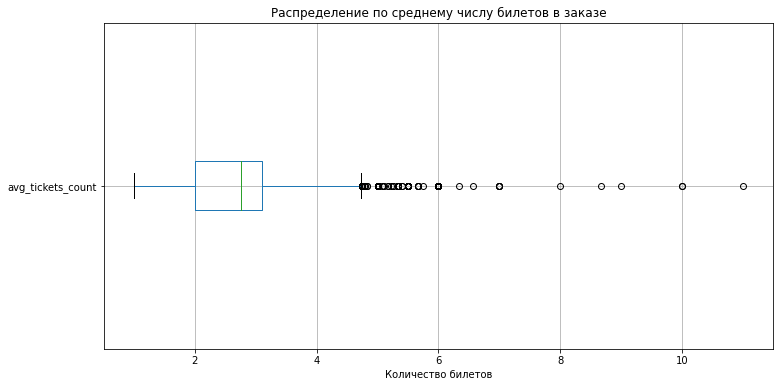

In [56]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize = (12,6))

# Строим диаграмму размаха значений  
user_profile.boxplot(column = 'avg_tickets_count', vert = False)

# Добавляем заголовок и метки оси
plt.title('Распределение по среднему числу билетов в заказе')
plt.xlabel('Количество билетов')


# Выводим график
plt.show()

Среднее значение и медиана почти равны. Пользователи в среднем покупают за раз по 2-3 билета. Более 5 билетов покупаются уже редко, что можно увидеть по диаграмме размаха. Максимальное среднее количество билетов за раз - 11, что выглядит вполне реальным. 

Данные можно оставить и учитывать при анализе.

In [57]:
display('Статистические показатели по среднему количеству дней между покупками:')
user_profile['avg_days_since_prev'].describe()

'Статистические показатели по среднему количеству дней между покупками:'

count    13297.000000
mean        16.101314
std         22.399512
min          0.000000
25%          1.333333
50%          8.352941
75%         20.750000
max        148.000000
Name: avg_days_since_prev, dtype: float64

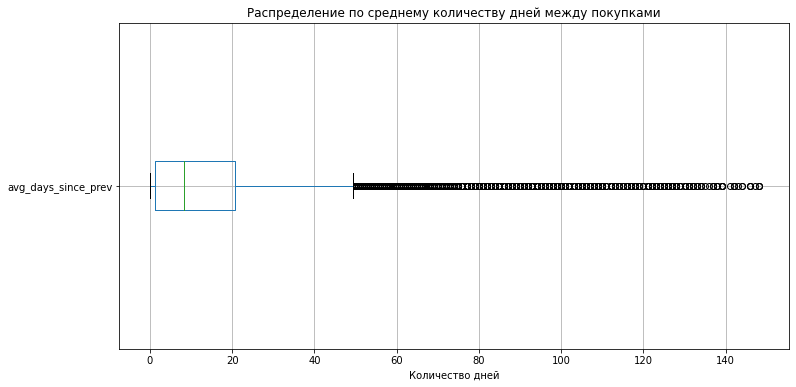

In [58]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize = (12,6))

# Строим диаграмму размаха значений  
user_profile.boxplot(column = 'avg_days_since_prev', vert = False)

# Добавляем заголовок и метки оси
plt.title('Распределение по среднему количеству дней между покупками')
plt.xlabel('Количество дней')


# Выводим график
plt.show()

Медиана ниже среднего значения, что говорит о большом количестве положительных выбросов, которые  перетягивают значения вправо. Среднее максимально количество дней между заказами - 148, что может быть реальным, но встречается редко, поэтому является выбросом. В среднем проходит 1-20 дней между заказами пользователей.

In [59]:
user_profile[user_profile['avg_days_since_prev'] > 50].shape[0]

990

У 990 пользователей между заказами прошло в среднем  больше 50 дней. Это малое количество пользователей по сравнению с основным количеством клиентов.
Значения выглядят реальными.
Данные можно оставить и учитывать при анализе.

In [60]:
user_count = user_profile['user_id'].nunique()
display(f'Общее число пользователей в выборке после фильтрации: {user_count}')

avg_revenue = round(user_profile['avg_revenue_rub'].mean(), 2)
display(f'Средняя выручка с одного заказа после фильтрации: {avg_revenue}')

relative_is_two = user_profile['is_two'].mean()
display(f'Доля пользователей совершивших 2 и более заказа после фильтрации: {relative_is_two:.2f}')

relative_is_five = user_profile['is_five'].mean()
display(f'Доля пользователей совершивших 5 и более заказа после фильтрации: {relative_is_five:.2f}')

'Общее число пользователей в выборке после фильтрации: 21638'

'Средняя выручка с одного заказа после фильтрации: 544.71'

'Доля пользователей совершивших 2 и более заказа после фильтрации: 0.61'

'Доля пользователей совершивших 5 и более заказа после фильтрации: 0.28'

In [61]:
final_row_profile = user_profile.shape[0]

In [62]:
quantity_row_profile = ininstal_row_profile - final_row_profile

relative_value_profile = round(quantity_row_profile / ininstal_row_profile * 100, 2)

In [63]:
display('Всего было строк', ininstal_row_profile)
display('Количество удаленных строк', quantity_row_profile)
display('Количество строк после фильтрации', final_row_profile)
display('Относительное количество строк после фильтрации', relative_value_profile)

'Всего было строк'

21854

'Количество удаленных строк'

216

'Количество строк после фильтрации'

21638

'Относительное количество строк после фильтрации'

0.99

Был создан профиль пользователя - `user_profile`. В котором было 21854 строк и 13 столбцов. 

Для каждого пользователя было найдено:

- `user_id ` - уникальный идентификатор пользователя, совершившего заказ. 
- `first_device_type` - тип устройства, с которого был оформлен первый заказ.
- `first_region_name` - регион, в котором был сделан первый заказ.
- `first_service_name` - название билетного партнёра, к которому обращались при первом заказе.
- `first_event_type` - жанр первого посещённого мероприятия.
- `first_order_ts` - дата и время создания первого заказа.
- `last_order_ts`-  дата и время создания последнего заказа.
- `order_count` - общее количество заказов.
- `avg_revenue_rub` - средняя выручка с одного заказа в рублях.
- `avg_tickets_count` - среднее количество билетов в заказе. 
- `avg_days_since_prev` - среднее время между заказами.
- `is_two` - совершил ли пользователь 2 и более заказа.
- `is_five` - совершил ли пользователь 5 и более заказов.

Изначальные данные:
- Общее число пользователей: 21854.
- Средняя выручка с одного заказа: 544.4
- Доля пользователей совершивших 2 и более заказа: 0.62
- Доля пользователей совершивших 5 и более заказа: 0.29

Были изучены статистические показатели по общему числу заказов: 
- Было не много пользователей, которые совершили за весь период больше 2000 заказов, они выглядят как выбросы, так как встречаются на много реже относитльно общего количества.
- Данные были отфильтрованы по 99-му процентилю.
- После фильтрации максималное значение стало 152 заказа. 

Были изучены статистические показатели по среднему числу билетов в заказе: 
- Пользователи в среднем покупают за раз по 2-3 билета. Более 5 билетов покупаются уже редко, что можно увидеть по диаграмме размаха. Максимальное среднее количество билетов за раз - 11, что выглядит вполне реальным. 

Были изучены статистические показатели по среднему количеству дней между покупками: 
- Среднее максимально количество дней между заказами - 148, что может быть реальным, но встречается редко, поэтому является выбросом. В среднем проходит 1-20 дней между заказами пользователей.

Данные после фильтрации:
- Общее число пользователей в выборке после фильтрации: **21638**
- Средняя выручка с одного заказа после фильтрации: **544.71**
- Доля пользователей совершивших 2 и более заказа после фильтрации: **0.61**
- Доля пользователей совершивших 5 и более заказа после фильтрации: **0.28**

Данных достаточно по объему для дальнейшего исследования. Аномальные значения были отфильтрованы. 


---

### 4. Исследовательский анализ данных

Следующий этап — исследование признаков, влияющих на возврат пользователей, то есть на совершение повторного заказа. Для этого используйте профили пользователей.



#### 4.1. Исследование признаков первого заказа и их связи с возвращением на платформу

Исследуйте признаки, описывающие первый заказ пользователя, и выясните, влияют ли они на вероятность возвращения пользователя.

---

**Задача 4.1.1.** Изучите распределение пользователей по признакам.

- Сгруппируйте пользователей:
    - по типу их первого мероприятия;
    - по типу устройства, с которого совершена первая покупка;
    - по региону проведения мероприятия из первого заказа;
    - по билетному оператору, продавшему билеты на первый заказ.
- Подсчитайте общее количество пользователей в каждом сегменте и их долю в разрезе каждого признака. Сегмент — это группа пользователей, объединённых определённым признаком, то есть объединённые принадлежностью к категории. Например, все клиенты, сделавшие первый заказ с мобильного телефона, — это сегмент.
- Ответьте на вопрос: равномерно ли распределены пользователи по сегментам или есть выраженные «точки входа» — сегменты с наибольшим числом пользователей?

---


In [64]:
grouped_event_type = user_profile['first_event_type'].value_counts()

display('Количество пользователей по типу их первого мероприятия:')
grouped_event_type

'Количество пользователей по типу их первого мероприятия:'

концерты    9560
другое      5426
театр       4239
стендап     1110
спорт        794
выставки     414
ёлки          95
Name: first_event_type, dtype: int64

In [65]:
relative_grouped_event_type = (user_profile['first_event_type'].value_counts(normalize = True) * 100)

display(f'Доля в разрезе по первому мероприятию:')
relative_grouped_event_type

'Доля в разрезе по первому мероприятию:'

концерты    44.181532
другое      25.076255
театр       19.590535
стендап      5.129864
спорт        3.669470
выставки     1.913301
ёлки         0.439042
Name: first_event_type, dtype: float64

Больше всего пользователи покупают билеты на:
- концерты.
- другое.
- театр.

На остальные 4 жанра приходится порядка - 11% билетов:
- стендап - 5,1%.
- спорт - 3,6%.
- выставки - 1,9%.
- ёлки - 0,4%.

Меньше всего на **ёлки**, это может быть из-за сезонности данного мероприятия, а также оно проводится в осномном  для детей, оба этих фактора влияют на количество продаж.

Пользователи распределены не равномерно, так как почти 45% заказов уходят только на концерты. А остальная половина распределена между другими жанрами. Есть выраженная "точка входа" - концерты.

In [66]:
grouped_device = user_profile['first_device_type'].value_counts()

display(f'Количество пользователей по типу устройства, с которого совершена первая покупка:')
grouped_device

'Количество пользователей по типу устройства, с которого совершена первая покупка:'

mobile     17924
desktop     3714
Name: first_device_type, dtype: int64

In [67]:
relative_grouped_device = (user_profile['first_device_type'].value_counts(normalize = True) * 100)

display(f'Доля в разрезе по типу устройства, с которого совершена первая покупка:')
relative_grouped_device

'Доля в разрезе по типу устройства, с которого совершена первая покупка:'

mobile     82.835752
desktop    17.164248
Name: first_device_type, dtype: float64

Больше всего пользователи совершают покупки билетов через мобильный телефон - 83%. В то время как через компьютер всего 17%. Пользователи также распределены не равномерно. "Точкой входа" будут покупки через телефон.

In [68]:
grouped_region = user_profile['first_region_name'].value_counts()

display(f'Количество пользователей по региону проведения мероприятия из первого заказа:')
grouped_region

'Количество пользователей по региону проведения мероприятия из первого заказа:'

Каменевский регион          7085
Североярская область        3767
Широковская область         1224
Озернинский край             675
Малиновоярский округ         525
                            ... 
Тихогорская область            2
Светолесский край              2
Верхозёрский край              1
Сосноводолинская область       1
Яснопольский округ             1
Name: first_region_name, Length: 81, dtype: int64

In [69]:
relative_grouped_region = (user_profile['first_region_name'].value_counts(normalize = True) * 100)

display(f'Доля в разрезе по региону проведения мероприятия из первого заказа:')
relative_grouped_region

'Доля в разрезе по региону проведения мероприятия из первого заказа:'

Каменевский регион          32.743322
Североярская область        17.409188
Широковская область          5.656715
Озернинский край             3.119512
Малиновоярский округ         2.426287
                              ...    
Тихогорская область          0.009243
Светолесский край            0.009243
Верхозёрский край            0.004621
Сосноводолинская область     0.004621
Яснопольский округ           0.004621
Name: first_region_name, Length: 81, dtype: float64

Пользователи распределены не равномерно. Больше всего пользователи покупали билет в Каменевский регион (33%) и Североярскую область (17%). Меньше всего пользователи покупают билеты в  Верхозёрский край, Сосноводолинскую область, Яснопольский округ.  Такой разброс в заказах может быть из-за того, что в некоторых регионах проводят меньше мероприятий, также на это влияет население, в больших городах больше вариантов мероприятий.

In [70]:
grouped_service = user_profile['first_service_name'].value_counts()

display(f'Количество пользователей по билетному оператору, продавшему билеты на первый заказ:')
grouped_service

'Количество пользователей по билетному оператору, продавшему билеты на первый заказ:'

Билеты без проблем        5186
Мой билет                 2969
Лови билет!               2809
Билеты в руки             2559
Облачко                   2177
Весь в билетах            1285
Лучшие билеты             1184
Прачечная                  583
Край билетов               454
Дом культуры               356
Яблоко                     318
Тебе билет!                308
Городской дом культуры     215
Мир касс                   209
За билетом!                201
Быстробилет                162
Show_ticket                157
Выступления.ру              95
Восьмёрка                   85
Быстрый кассир              61
Crazy ticket!               45
Росбилет                    40
Радио ticket                36
Реестр                      33
Телебилет                   27
Цвет и билет                22
Шоу начинается!             19
КарандашРУ                  15
Кино билет                   9
Вперёд!                      7
Билет по телефону            6
Тех билет                    3
Лимоны  

In [71]:
relative_grouped_service = (user_profile['first_service_name'].value_counts(normalize = True) * 100)

display(f'Доля в разрезе по билетному оператору, продавшему билеты на первый заказ:')
relative_grouped_service

'Доля в разрезе по билетному оператору, продавшему билеты на первый заказ:'

Билеты без проблем        23.967095
Мой билет                 13.721231
Лови билет!               12.981791
Билеты в руки             11.826416
Облачко                   10.061004
Весь в билетах             5.938626
Лучшие билеты              5.471855
Прачечная                  2.694334
Край билетов               2.098161
Дом культуры               1.645254
Яблоко                     1.469637
Тебе билет!                1.423422
Городской дом культуры     0.993622
Мир касс                   0.965893
За билетом!                0.928921
Быстробилет                0.748683
Show_ticket                0.725575
Выступления.ру             0.439042
Восьмёрка                  0.392827
Быстрый кассир             0.281911
Crazy ticket!              0.207967
Росбилет                   0.184860
Радио ticket               0.166374
Реестр                     0.152509
Телебилет                  0.124780
Цвет и билет               0.101673
Шоу начинается!            0.087808
КарандашРУ                 0

Больше всего пользователи покупают у:
- Билеты без проблем - 24%
- Мой билет - 14%
- Лови билет! - 13%
- Билеты в руки -  12%
- Облачко - 10%

Пользователи распределены не равномерно. Это может зависеть также от количества проводимых мероприятий в регионах, так как некоторые компании предоставляют билеты в определенные регионы. Также операторы могут проводить акции для привлечения пользоватей.

---

**Задача 4.1.2.** Проанализируйте возвраты пользователей:

- Для каждого сегмента вычислите долю пользователей, совершивших два и более заказа.
- Визуализируйте результат подходящим графиком. Если сегментов слишком много, то поместите на график только 10 сегментов с наибольшим количеством пользователей. Такое возможно с сегментами по региону и по билетному оператору.
- Ответьте на вопросы:
    - Какие сегменты пользователей чаще возвращаются на Яндекс Афишу?
    - Наблюдаются ли успешные «точки входа» — такие сегменты, в которых пользователи чаще совершают повторный заказ, чем в среднем по выборке?

При интерпретации результатов учитывайте размер сегментов: если в сегменте мало пользователей (например, десятки), то доли могут быть нестабильными и недостоверными, то есть показывать широкую вариацию значений.

---


In [72]:
grouped = user_profile.groupby('first_event_type')['is_two'].value_counts(normalize = True).unstack(fill_value = 0)

grouped_sorted = grouped.sort_values(by = 1, ascending = False)
display('Доля по типу их первого мероприятия для пользователей совершивших два и более заказа:')
grouped_sorted

'Доля по типу их первого мероприятия для пользователей совершивших два и более заказа:'

is_two,0,1
first_event_type,,
выставки,0.359903,0.640097
театр,0.366124,0.633876
концерты,0.381695,0.618305
стендап,0.390991,0.609009
другое,0.403797,0.596203
спорт,0.442065,0.557935
ёлки,0.442105,0.557895


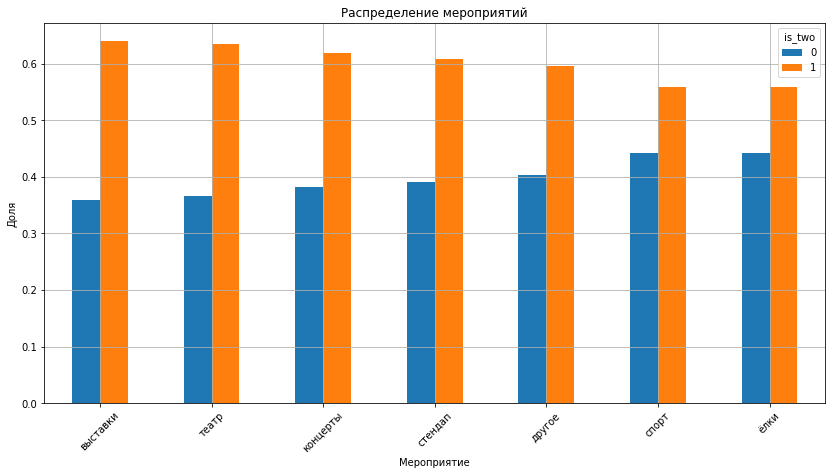

In [73]:
grouped_sorted.plot(
    kind = 'bar',
    title = 'Распределение мероприятий',
    xlabel = 'Мероприятие',
    ylabel = 'Доля',
    rot = 45,
    figsize = (14,7)
)

plt.grid()

plt.show()

Чаще всего возвращаются за покупкой билетов на:
- выставку (64%)
- театр (63%)
- концерты (61%)

В среднем пользователи равномерно возвращаются и не возвращаются за покупками в зависимости от жанра  мероприятия **64% - 56%.**  

In [74]:
grouped = user_profile.groupby('first_device_type')['is_two'].value_counts(normalize = True).unstack(fill_value = 0)

grouped_sorted = grouped.sort_values(by = 1, ascending = False)
display('Доля по типу устройства пользователей совершивших два и более заказа:')
grouped_sorted

'Доля по типу устройства пользователей совершивших два и более заказа:'

is_two,0,1
first_device_type,,
desktop,0.361874,0.638126
mobile,0.391877,0.608123


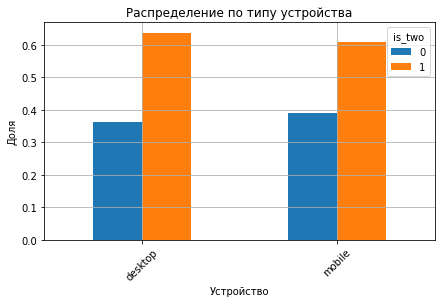

In [75]:
grouped_sorted.plot(
    kind = 'bar',
    title = 'Распределение по типу устройства',
    xlabel = 'Устройство',
    ylabel = 'Доля',
    rot = 45,
    figsize = (7,4)
)

plt.grid()

plt.show()

Чаще пользователи возвращаются на Яндекс Афишу через компьютер - 64%. 

Но через телефон пользователи совершают повторные покупки не на много реже - 61%. 

Поэтому можно сказать, что пользователи равномерно распределены по устройствам для повторного заказа.

In [76]:
grouped = user_profile.groupby('first_region_name')['is_two'].value_counts(normalize = True).unstack(fill_value = 0)

grouped_sorted = grouped.sort_values(by = 1, ascending = False)
display('Доля по региону мероприятия для пользователей совершивших два и более заказа:')
grouped_sorted

'Доля по региону мероприятия для пользователей совершивших два и более заказа:'

is_two,0,1
first_region_name,,
Верхозёрский край,0.000000,1.000000
Озернопольская область,0.103448,0.896552
Радужнопольский край,0.217391,0.782609
Лесостепной край,0.283333,0.716667
Горноземский регион,0.310345,0.689655
...,...,...
Теплоозёрский округ,0.666667,0.333333
Крутоводский регион,0.666667,0.333333
Островогорский округ,0.800000,0.200000


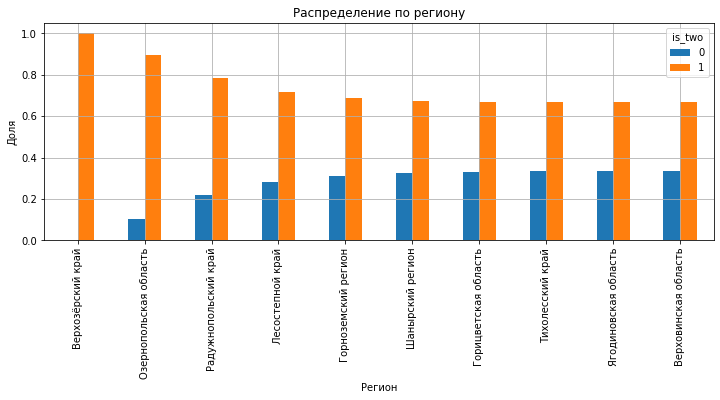

In [77]:
grouped_sorted_bar = grouped_sorted.head(10)

grouped_sorted_bar.plot(
    kind = 'bar',
    title = 'Распределение по региону',
    xlabel = 'Регион',
    ylabel = 'Доля',
    rot = 90,
    figsize = (12,4)
)

plt.grid()

plt.show()

Если посмотреть на  график, то в Верхозёрский край пользователи возвращаются со 100% вероятностью, в тот момент когда в Сосноводолинская область и Яснопольский округ с 0% веростностью. Но так как пользователей в Верхозёрский край мало, то доли не стабильные. В Каменевском регионе больше всего пользователей, возвращаются туда - `62%`. В Североярской области тоже больше пользователей относительно общей массы и туда возвращаются - `64%` пользователей. На третьем месте по количеству пользователей Широковская область, в которую возвращаются - `65%` пользователей. 

Выше всего доля возвратов пользователей у регионов с низким колчеством пользователей, поэтому **доли можно считать не стабильными** 

**Точками входа по регионам можно считать регионы с большим количеством пользователей**, так как у них будет большее количество возвратов даже при той же доле, что и в регионах с 500 и меньше пользователями.

In [78]:
grouped = user_profile.groupby('first_service_name')['is_two'].value_counts(normalize = True).unstack(fill_value = 0)

grouped_sorted = grouped.sort_values(by = 1, ascending = False)
display('Доля по билетному оператору, для пользователей совершивших два и более заказа:')
grouped_sorted

'Доля по билетному оператору, для пользователей совершивших два и более заказа:'

is_two,0,1
first_service_name,,
Зе Бест!,0.000000,1.000000
Быстрый кассир,0.147541,0.852459
Билет по телефону,0.166667,0.833333
Реестр,0.181818,0.818182
Crazy ticket!,0.311111,0.688889
Восьмёрка,0.317647,0.682353
Край билетов,0.348018,0.651982
Росбилет,0.350000,0.650000
Show_ticket,0.350318,0.649682


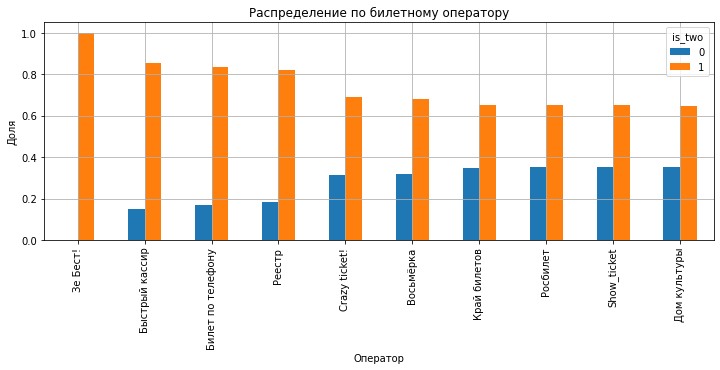

In [79]:
grouped_sorted_bar = grouped_sorted.head(10)

grouped_sorted_bar.plot(
    kind = 'bar',
    title = 'Распределение по билетному оператору',
    xlabel = 'Оператор',
    ylabel = 'Доля',
    rot = 90,
    figsize = (12,4)
)

plt.grid()

plt.show()

Пользователи с 100% возвращаются к оператору `Зе Бест!`, меньше всего пользователи возвращаются к `Шоу начинается!` - 32%. 
Выше всего доля возвратов пользователей у операторов с низким колчеством пользователей, поэтому доли можно считать не стабильными. 

Больше всего пользователей у `Билеты без проблем` и доля возвратов 60%. `Лови билет!` и `Мой билет` имеют одинаковое количество пользователей и одинаковую долю возвратов пользователей - 61%. 

`Билеты в руки` имеют долю возвратов - 63% при количестве пользователей - 2559. `Облачко` - 61% при 2177 пользователей. 

"Точки входа" не наблюдается, возвраты все примерно на одной уровне 60-63%

---

**Задача 4.1.3.** Опираясь на выводы из задач выше, проверьте продуктовые гипотезы:

- **Гипотеза 1.** Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.
- **Гипотеза 2.** В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.

---

In [80]:
#Гипотеза 1.
hyp1_df = user_profile[user_profile['first_event_type'].isin(['спорт', 'концерты'])]

In [81]:
grouped = hyp1_df.groupby('first_event_type')['is_two'].value_counts(normalize = True).unstack(fill_value = 0)

grouped_sorted = grouped.sort_values(by = 1, ascending = False)
display('Доля пользователей по первому посещенному мероприятию:')
grouped_sorted

'Доля пользователей по первому посещенному мероприятию:'

is_two,0,1
first_event_type,,
концерты,0.381695,0.618305
спорт,0.442065,0.557935


Доля примерно равна, но у концертов (62%) доля возвратов выше на 6%, чем у спорта (56%). Поэтому **гипотеза не подтверждается**. 

In [82]:
#Гипотеза 2.
hyp2_df = grouped_region = user_profile['first_region_name'].value_counts()

#Найдем медиану количества пользователей по регионам
median_region = hyp2_df.median() 

#Выберем активные регионы 
active_regions = hyp2_df[hyp2_df >= median_region].index

#Выберем менее активные регионы 
inactive_regions = hyp2_df[hyp2_df < median_region].index

In [83]:
#Найдём долю возвратов в активных регионах
active = user_profile[user_profile['first_region_name'].isin(active_regions)]['is_two'].mean()

#Найдем долю возврата в менее активных регионах
unactive = user_profile[user_profile['first_region_name'].isin(inactive_regions)]['is_two'].mean()

display(f'Доля возвратов в активных регионах: {active:.2f}')
display(f'Доля возвратов в менее активных регионах: {unactive:.2f}')

'Доля возвратов в активных регионах: 0.62'

'Доля возвратов в менее активных регионах: 0.56'

В акитвных регионах (62%) доля возвратов пользователей выше на 6%, чем в менее активных (56%). **Гипотеза подтвердилась**.

---

#### 4.2. Исследование поведения пользователей через показатели выручки и состава заказа**

Изучите количественные характеристики заказов пользователей, чтобы узнать среднюю выручку сервиса с заказа и количество билетов, которое пользователи обычно покупают.
Эти метрики важны не только для оценки выручки, но и для оценки вовлечённости пользователей. Возможно, пользователи с более крупными и дорогими заказами более заинтересованы в сервисе и поэтому чаще возвращаются.

---

**Задача 4.2.1.** Проследите связь между средней выручкой сервиса с заказа и повторными заказами.

Постройте сравнительные гистограммы распределения средней выручки с билета ( avg_revenue_rub ):
- для пользователей, совершивших один заказ;
- для вернувшихся пользователей, совершивших 2 и более заказа.

Ответьте на вопросы: 
- В каких диапазонах средней выручки концентрируются пользователи из каждой группы?
- Есть ли различия между группами?

Рекомендации:
Используйте одинаковые интервалы ( bins ) и прозрачность ( alpha ), чтобы визуально сопоставить распределения.
Задайте параметру density значение True, чтобы сравнивать форму распределений, даже если число пользователей в группах отличается.

---

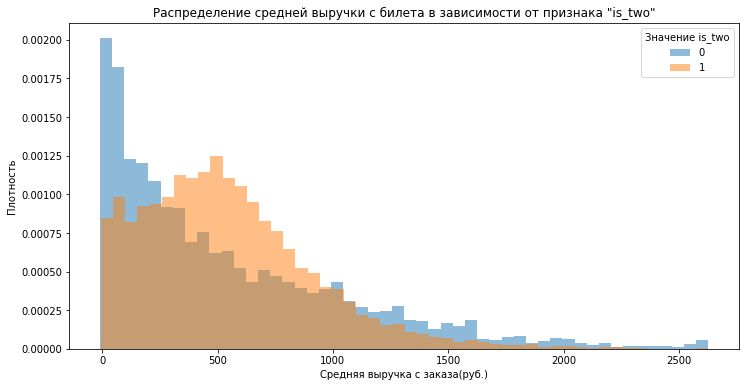

In [84]:
# Создаём фигуру графика
plt.figure(figsize=(12, 6))

for i in user_profile['is_two'].unique():
    user_profile.loc[user_profile['is_two'] == i,'avg_revenue_rub'].plot(
        kind = 'hist',
        density = True,
        alpha = 0.5,
        bins = 50,
        label = f'{i}',
        legend = True
    )
    
plt.title('Распределение средней выручки с билета в зависимости от признака "is_two"') 
plt.xlabel('Средняя выручка с заказа(руб.)') 
plt.ylabel('Плотность')
plt.legend(title = 'Значение is_two')
plt.show()

**В каких диапазонах средней выручки концентрируются пользователи из каждой группы?**

Пользователи совершившие 1 заказ сконцентрированы в диапозоне 0-300 российских рублей. Что является низкой средней выручкой. После 500 рублей плотность снижается, есть также длинный правый хвост.

Пользователи совершившие 2 и более заказов сконцентрированы 400-800 рублей. Распределение более плоское и без таких резких скачков.  

**Есть ли различия между группами?**

По гистограмме видно, что распределение возвратов пользоветелей по среднему чеку заказов сдвинуто вправо, по отоношению к пользователям, которые совершают только 1 заказ. 
 
Это говорит о большей доле "дорогих" пользователей среди вернувшихся. **Чем выше чек, тем выше выроятность, что пользователь вернется.**

---

**Задача 4.2.2.** Сравните распределение по средней выручке с заказа в двух группах пользователей:

- совершившие 2–4 заказа;
- совершившие 5 и более заказов.

Ответьте на вопрос: есть ли различия по значению средней выручки с заказа между пользователями этих двух групп?

---


In [85]:
df_2_4 = user_profile[(user_profile['is_two'] == 1) & (user_profile['is_five'] == 0)]
df_5 = user_profile[user_profile['is_five'] == 1]

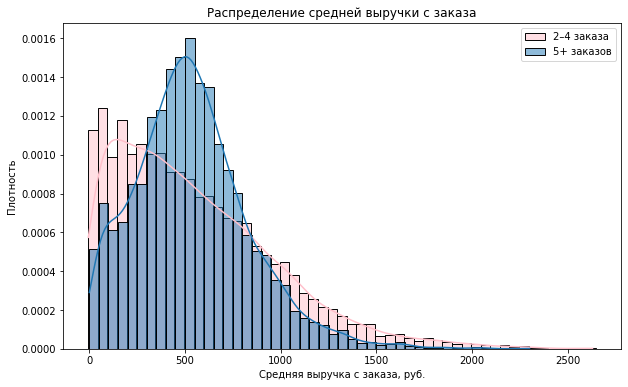

In [86]:
plt.figure(figsize=(10, 6))

sns.histplot(df_2_4['avg_revenue_rub'], bins=50, kde=True, stat='density', label='2–4 заказа', alpha=0.5, binwidth = 50, color = 'pink')
sns.histplot(df_5['avg_revenue_rub'], bins=50, kde=True, stat='density', label='5+ заказов', alpha=0.5, binwidth = 50)

plt.title('Распределение средней выручки с заказа')
plt.xlabel('Средняя выручка с заказа, руб.')
plt.ylabel('Плотность')
plt.legend()
plt.show()

In [87]:
display('Статистические показатели по пользователям совершившие от 2 до 4 заказов')
df_2_4['avg_revenue_rub'].describe()

'Статистические показатели по пользователям совершившие от 2 до 4 заказов'

count    7147.000000
mean      551.572386
std       420.197691
min        -5.385000
25%       218.428750
50%       471.266667
75%       798.550000
max      2628.421739
Name: avg_revenue_rub, dtype: float64

In [88]:
display('Статистические показатели по пользователям совершившие 5 и более заказов')
df_5['avg_revenue_rub'].describe()

'Статистические показатели по пользователям совершившие 5 и более заказов'

count    6123.000000
mean      535.891950
std       299.089582
min         0.000000
25%       330.456122
50%       512.650613
75%       700.809038
max      2299.869022
Name: avg_revenue_rub, dtype: float64

Медиана у пользователей совершивших 5 и более(`512`) заказов выше, чем у пользователей с 2-4(`471`) заказами. Максимальное среднее значение выше в пользователей с 2-4 заказами - `2628 рублей`. Среднее значение находится на одном уровне `551` (2-4 заказов) и `535` (5 и более). Пользователей с 2-4 заказами больше на `~1000`. При этом у пользователей с 2-4 заказами есть возвраты заказов, так как минимальное значение -5,4 рубля, в то время как у пользователей с 5 и более заказами минимальное значение 0. 

Значения находятся примерно на одном уровне, но средний чек у пользователей с 5 и более заказами выше. 

---

**Задача 4.2.3.** Проанализируйте влияние среднего количества билетов в заказе на вероятность повторной покупки.

- Изучите распределение пользователей по среднему количеству билетов в заказе (`avg_tickets_count`) и опишите основные наблюдения.
- Разделите пользователей на несколько сегментов по среднему количеству билетов в заказе:
    - от 1 до 2 билетов;
    - от 2 до 3 билетов;
    - от 3 до 5 билетов;
    - от 5 и более билетов.
- Для каждого сегмента подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы.
- Ответьте на вопросы:
    - Как распределены пользователи по сегментам — равномерно или сконцентрировано?
    - Есть ли сегменты с аномально высокой или низкой долей повторных покупок?

---

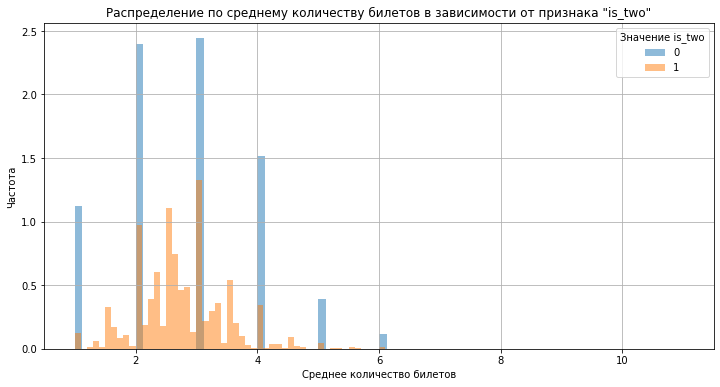

In [89]:
# Создаём фигуру графика
plt.figure(figsize=(12, 6))

for i in user_profile['is_two'].unique():
    user_profile.loc[user_profile['is_two'] == i,'avg_tickets_count'].plot(
        kind = 'hist',
        density = True,
        alpha = 0.5,
        bins = 80,
        label = f'{i}',
        legend = True
    )
    
plt.title('Распределение по среднему количеству билетов в зависимости от признака "is_two"') 
plt.xlabel('Среднее количество билетов') 
plt.ylabel('Частота')
plt.legend(title = 'Значение is_two')
plt.grid()
plt.show()

In [90]:
user_profile['avg_tickets_count'].describe()

count    21638.000000
mean         2.743319
std          0.917486
min          1.000000
25%          2.000000
50%          2.750000
75%          3.095238
max         11.000000
Name: avg_tickets_count, dtype: float64

Среднее значение и медиана почти равны 2.74 и 2.75 соответственно. Основная масса пользователей, которые возвращаются в среднем покупают за раз по 2-3 билета. Более 4 билетов покупаются уже редко, что можно увидеть по гистограмме распределения, так  как значения после 4 формируют правый хвост. Максимальное среднее количество билетов за раз - 11, а минимально - 1. Пользователи с большим средним количеством билетом обычно покупают билеты для семьи, компании, что может быть связано с повторными покупками.

In [91]:
#Разделим пользователей на сегменты
user_profile['tickets_segment'] = pd.cut(
    user_profile['avg_tickets_count'],
    bins = [1,2,3,5, float('inf')],
    right = True,
    include_lowest = True,
    labels = ['от 1 до 2', 'от 2 до 3', 'от 3 до 5', 'от 5 и более']
)

In [92]:
grouped_count = user_profile.groupby('tickets_segment')['user_id'].count()

grouped_sum = user_profile.groupby('tickets_segment')['is_two'].sum()

grouped_mean = grouped_sum / grouped_count
display('Общее число пользователей по сегментам:')
grouped_count

'Общее число пользователей по сегментам:'

tickets_segment
от 1 до 2       6160
от 2 до 3       9935
от 3 до 5       5349
от 5 и более     194
Name: user_id, dtype: int64

In [93]:
display('Общее число вернувшихся пользователей по сегментам:')
grouped_sum

'Общее число вернувшихся пользователей по сегментам:'

tickets_segment
от 1 до 2       2473
от 2 до 3       7380
от 3 до 5       3354
от 5 и более      63
Name: is_two, dtype: int64

In [94]:
display('Доля вернувшихся пользователей по сегментам:')
grouped_mean

'Доля вернувшихся пользователей по сегментам:'

tickets_segment
от 1 до 2       0.401461
от 2 до 3       0.742828
от 3 до 5       0.627033
от 5 и более    0.324742
dtype: float64

Пользователи распределены по сегментам не равномерно. В сегменте `от 2 до 3` больше всего пользователей - 9935, а вернувшихся -  7380. Меньше всего пользователей в сегменте `от 5 и более` - 194, вернувшихся - 63. 

Выше всех доля возвравтов пользователей в сегментах:
- `от 2 до 3` - 74%
- `от 3 до 5` - 63% 

---

#### 4.3. Исследование временных характеристик первого заказа и их влияния на повторные покупки

Изучите временные параметры, связанные с первым заказом пользователей:

- день недели первой покупки;
- время с момента первой покупки — лайфтайм;
- средний интервал между покупками пользователей с повторными заказами.

---

**Задача 4.3.1.** Проанализируйте, как день недели, в которой была совершена первая покупка, влияет на поведение пользователей.

- По данным даты первого заказа выделите день недели.
- Для каждого дня недели подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы. Результаты визуализируйте.
- Ответьте на вопрос: влияет ли день недели, в которую совершена первая покупка, на вероятность возврата клиента?

---


In [95]:
#Выделим день недели по первым заказам
user_profile['first_day'] = user_profile['first_order_ts'].dt.day_of_week

In [96]:
#Посчитаем количество пользователей вернувшихся по дням недели
segment_stats = user_profile.groupby('first_day').agg(
    users_count = ('user_id', 'count'),
    refund_user =  ('is_two', 'sum')
).reset_index()

#Посчитаем долю вернувшихся по дням недели
segment_stats['refund_percentage'] = (segment_stats['refund_user'] / segment_stats['users_count'])

In [97]:
display('Общее число пользователей по дням недели:')
segment_stats['users_count']

'Общее число пользователей по дням недели:'

0    2930
1    3176
2    3057
3    3113
4    3259
5    3326
6    2777
Name: users_count, dtype: int64

In [98]:
display('Общее число вернувшихся пользователей по дням недели:')
segment_stats['refund_user']

'Общее число вернувшихся пользователей по дням недели:'

0    1847
1    1966
2    1901
3    1850
4    1950
5    2089
6    1667
Name: refund_user, dtype: int64

In [99]:
display('Доля вернувшихся пользователей по дням недели:')
segment_stats['refund_percentage']

'Доля вернувшихся пользователей по дням недели:'

0    0.630375
1    0.619018
2    0.621851
3    0.594282
4    0.598343
5    0.628082
6    0.600288
Name: refund_percentage, dtype: float64

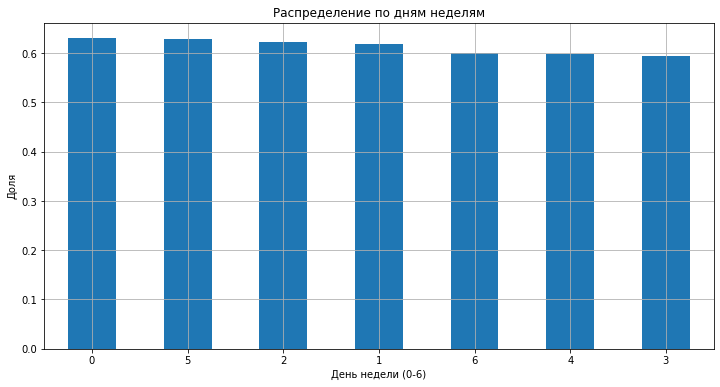

In [100]:
plt.figure(figsize = (12,6))

segment_stats['refund_percentage'].sort_values(ascending = False).plot(
    kind = 'bar',
    title = 'Распределение по дням неделям',
    xlabel = 'День недели (0-6)',
    ylabel = 'Доля',
    rot = 0,
)

plt.grid()
plt.show()

Пользователи распределены по дням недели равномерно, нет резких скачков значений. Меньше всего пользователей возвращается в воскресенье (1667), но и изначально в воскресенье меньше всего заказов (2777).  

Больше всего доля вернувшихся пользователей по: 
- Понедельникам - `63%`
- Субботам - `63%`

Меньше всего доля вернувшихся пользователей в четверг - `59%`. 

Доли вернувшихся пользоваталей находится на примерно  одном уровне **59% - 63%**. 

День недели не сильно влияет на возврат пользователей. 

- По понедельникам пользователи могут заказывать билеты на последующую неделю, а также рассылки от кампаний на неделю, что может являться причиной небольшого прироста возвратов. 

- По субботам пользователи могут заказывать больше билетов, так как по сравнению с будними днями есть больше свободного времени на просмотр мероприятий. 

- По четвергам может быть меньше активности, так как середина рабочей недели и пользователь может быть уставший, что снижает его желание на покупки. 

---

**Задача 4.3.2.** Изучите, как средний интервал между заказами влияет на удержание клиентов.

- Рассчитайте среднее время между заказами для двух групп пользователей:
    - совершившие 2–4 заказа;
    - совершившие 5 и более заказов.
- Исследуйте, как средний интервал между заказами влияет на вероятность повторного заказа, и сделайте выводы.

---


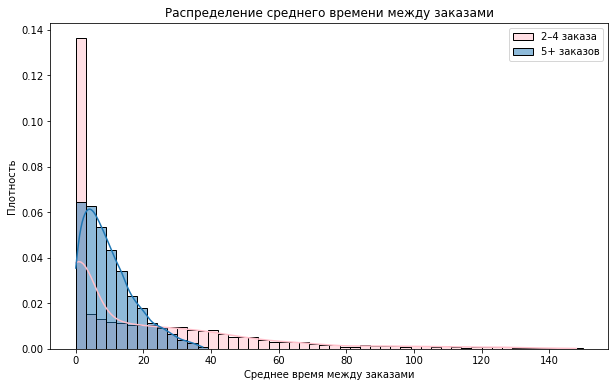

In [101]:
#Построим гистограмму распределения 
plt.figure(figsize=(10, 6))

sns.histplot(df_2_4['avg_days_since_prev'], bins=50, kde=True, stat='density', label='2–4 заказа', alpha=0.5, binwidth = 3, color = 'pink')
sns.histplot(df_5['avg_days_since_prev'], bins=50, kde=True, stat='density', label='5+ заказов', alpha=0.5, binwidth = 3)

plt.title('Распределение среднего времени между заказами')
plt.xlabel('Среднее время между заказами')
plt.ylabel('Плотность')
plt.legend()
plt.show()

In [102]:
df_2_4['avg_days_since_prev'].describe()

count    7147.000000
mean       21.329940
std        28.484605
min         0.000000
25%         0.000000
50%         9.000000
75%        34.000000
max       148.000000
Name: avg_days_since_prev, dtype: float64

In [103]:
df_5['avg_days_since_prev'].describe()

count    6123.000000
mean        9.900062
std         7.805239
min         0.000000
25%         3.876894
50%         8.117647
75%        14.111111
max        37.500000
Name: avg_days_since_prev, dtype: float64

Среднее время между заказами выше у сегмента с `2-4 заказами`(21), чем у сегмента `5 и более`(10). 

Пользователи с `5 и более` заказами имеют меньший интервал между заказами. А также более стабильное поведения. 

По гистаграмме распределение видно, что у сегмента с `2-4 заказами` имеется длинный правый хвост, о чем также говорит среднее значение(`21`) выше медианного (`9`). 
Также у сегмента `2-4 заказа` выское стандартное отклонение, что говорит о большом промежутке между средним интервалом. 

У сегмента `2-4 заказа` максимальное количество дней между заказами - 148, в то время как у сегмента с `5 и более` заказами - 38 дней. 

С ростом среднего времени между заказами также снижается вероятность повторной покупки, что можно увидеть на гистаграмме распределения у сегмента `2-4 заказа`. Резкое падение наблюдается после 9 дней, а также после 34 дней опять резко снижается вероятность возврата. 

**Среднее время между заказами влияет на возвращение пользователя.** Пользователи с меньши интервалом чаще совершают повторные покупки и формируют сегмент `5 и более` заказов. 

---

#### 4.4. Корреляционный анализ количества покупок и признаков пользователя

Изучите, какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок. Для этого используйте универсальный коэффициент корреляции `phi_k`, который позволяет анализировать как числовые, так и категориальные признаки.

---

**Задача 4.4.1:** Проведите корреляционный анализ:
- Рассчитайте коэффициент корреляции `phi_k` между признаками профиля пользователя и числом заказов (`total_orders`). При необходимости используйте параметр `interval_cols` для определения интервальных данных.
- Проанализируйте полученные результаты. Если полученные значения будут близки к нулю, проверьте разброс данных в `total_orders`. Такое возможно, когда в данных преобладает одно значение: в таком случае корреляционный анализ может показать отсутствие связей. Чтобы этого избежать, выделите сегменты пользователей по полю `total_orders`, а затем повторите корреляционный анализ. Выделите такие сегменты:
    - 1 заказ;
    - от 2 до 4 заказов;
    - от 5 и выше.
- Визуализируйте результат корреляции с помощью тепловой карты.
- Ответьте на вопрос: какие признаки наиболее связаны с количеством заказов?

---

In [104]:
#Вычислим корреляционную матрицу
interval_cols = ['avg_revenue_rub', 'avg_tickets_count', 'avg_days_since_prev']
carrelation_matrix = user_profile[
    interval_cols  
    + ['first_device_type', 
       'first_region_name', 
       'first_service_name', 
       'first_event_type', 
       'order_count', 
       'first_day']].phik_matrix(interval_cols = interval_cols)

display('Корреляционная  матрица с коэффициентом phi_k для переменной order_count')
carrelation_matrix.loc[carrelation_matrix.index != 'order_count'][['order_count']].sort_values(by = 'order_count', ascending=False)

'Корреляционная  матрица с коэффициентом phi_k для переменной order_count'

,order_count
avg_days_since_prev,0.493115
first_region_name,0.410223
avg_tickets_count,0.290347
avg_revenue_rub,0.254385
first_device_type,0.066900
first_day,0.040598
first_service_name,0.000000
first_event_type,0.000000


Значения близки к 0, потому что низкий разброс `order_count`. Проверим так ли это.

In [105]:
user_profile['order_count'].value_counts()

1      8368
2      3572
3      2175
4      1400
5       971
       ... 
103       1
136       1
89        1
137       1
143       1
Name: order_count, Length: 148, dtype: int64

Гипотеза подтвердилась, поэтому необходимо будет выделите сегменты пользователей по полю `order_count`:
- 1 заказ;
- от 2 до 4 заказов;
- от 5 и выше.

In [106]:
user_profile['orders_segment'] = pd.cut(
    user_profile['order_count'],
    bins = [0,1,4, float('inf')],
    labels = ['1 заказа', 'от 2 до 4 заказов', 'от 5 и выше']
)

Проверим распределение пользователей по заказам после сегментации. 

In [107]:
user_profile['orders_segment'].value_counts()

1 заказа             8368
от 2 до 4 заказов    7147
от 5 и выше          6123
Name: orders_segment, dtype: int64

In [108]:
#Вычислим корреляционную матрицу
carrelation_matrix = user_profile[
    interval_cols  
    + ['first_device_type', 
       'first_region_name', 
       'first_service_name', 
       'first_event_type', 
       'orders_segment', 
       'first_day']].phik_matrix(interval_cols = interval_cols)

display('Корреляционная  матрица с коэффициентом phi_k для переменной orders_segment')
carrelation_matrix.loc[carrelation_matrix.index != 'orders_segment'][['orders_segment']].sort_values(by = 'orders_segment', ascending=False)

'Корреляционная  матрица с коэффициентом phi_k для переменной orders_segment'

,orders_segment
avg_days_since_prev,0.391736
avg_tickets_count,0.383366
avg_revenue_rub,0.326091
first_region_name,0.123473
first_service_name,0.081308
first_event_type,0.040322
first_day,0.034267
first_device_type,0.017110


Заметна небольшая корреляция по количеству заказов со средним интервалом между заказами (`0.39`), средним количеством билетов в заказе (`0.38`), средней выручкой за заказ (`0.33`) и названием региона (`0.12`). Для остальный признаков корреляция снижается с 0.08 до 0.02. 

Теперь визуализируем результат корреляции с помощью тепловой карты.

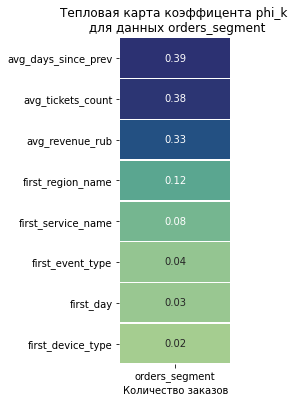

In [109]:
# Строим тепловую карту
plt.figure(figsize = (2,6))

#Сохраняем матрицу корреляции
data_heatmap = carrelation_matrix.loc[carrelation_matrix.index != 'orders_segment'][['orders_segment']].sort_values(by = 'orders_segment', ascending=False)

sns.heatmap(
    data_heatmap,
    annot = True,
    fmt = '.2f',
    cmap = 'crest',
    cbar = False,
    linewidths = 0.5
)

plt.title('Тепловая карта коэффицента phi_k \n для данных orders_segment')
plt.xlabel('Количество заказов')

plt.show()


Изучим распределение сегментов количества заказов по средним интервалам дней.

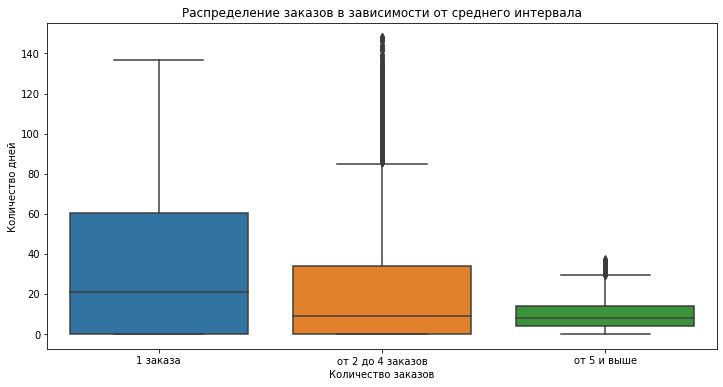

In [110]:
plt.figure(figsize=(12,6))


sns.boxplot(data = user_profile, x = 'orders_segment', y = 'avg_days_since_prev')


plt.title('Распределение заказов в зависимости от среднего интервала')
plt.xlabel('Количество заказов')
plt.ylabel('Количество дней')
plt.xticks(rotation = 0)
plt.show()

По диаграмме видно, что чем больше заказов, тем меньше интервал в днях между заказами. Также у сегмента `2-4 заказа` есть выбросы, которые были замечены и ранее и которые образуют правый хвост. 

Поэтому можно отметить, что связь между заказами и интервалом в днях есть.

Изучим распределение сегментов количества заказов по среднему количеству билетов.

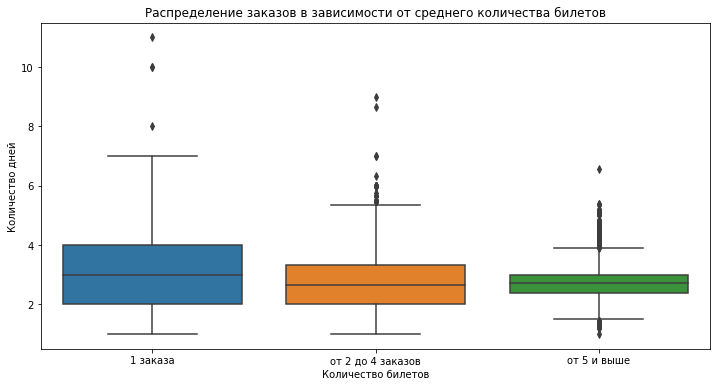

In [111]:
plt.figure(figsize=(12,6))


sns.boxplot(data = user_profile, x = 'orders_segment', y = 'avg_tickets_count')


plt.title('Распределение заказов в зависимости от среднего количества билетов')
plt.xlabel('Количество билетов')
plt.ylabel('Количество дней')
plt.xticks(rotation = 0)
plt.show()

- 1 заказ. Медиана около 3х билетов, большой разброс. 
- 2-4 заказа. Медиана ~2.5. 
- 5 заказов. Медиана ниже, чем у 1 заказа, но выше, чем у 2-4 заказов ~2.7.

У сегмента `5 и выше` меньше выбросов и экстримальных значений. Пользователи с высоким количством заказов покупают стабильнее. 

У сегмента `1 заказ` разовые крупные покупки, после которых пользователь не возвращается. В то время как у `5 и выше` более регулярные покупки. 

Среднее количество билетов отличается между сегментами по числу заказов. У пользователей с 5 и более заказами медиана выше, чем у пользователей с 2-4 заказами, что указывает на положительную корреляцию. 

Изучим распределение сегментов количества заказов по средней выручки от заказа.

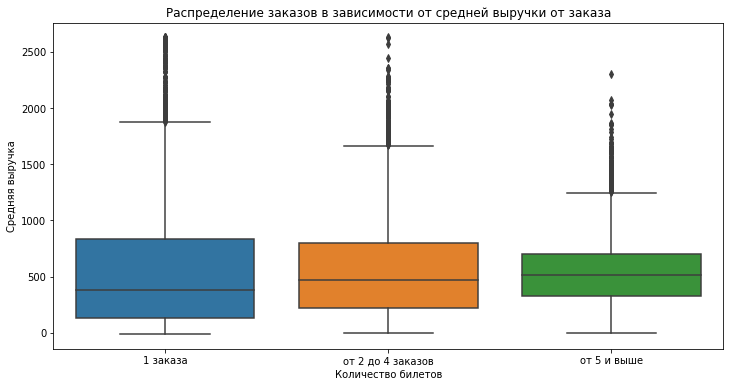

In [112]:
plt.figure(figsize=(12,6))


sns.boxplot(data = user_profile, x = 'orders_segment', y = 'avg_revenue_rub')


plt.title('Распределение заказов в зависимости от средней выручки от заказа')
plt.xlabel('Количество билетов')
plt.ylabel('Средняя выручка')
plt.xticks(rotation = 0)
plt.show()

По диаграмме видно, что у сегмента `5 и выше` медиана выручки от заказа выше, чем у прочих сегментов. Что говорит об умеренной положительной корреляции, так как чем больше заказов, тем выше медиана средней выручки от заказа. Также у сегмента `1 заказ` больше разбросов, хоть там есть значения выше, они являются разовыми. В то время, когда у 5 и более заказов более стабильные выручки.

In [113]:
top_region = (user_profile['first_region_name'].value_counts().head(10).index)

region_order = (user_profile[user_profile['first_region_name'].isin(top_region)].groupby('first_region_name')['order_count'].mean().sort_values().index)

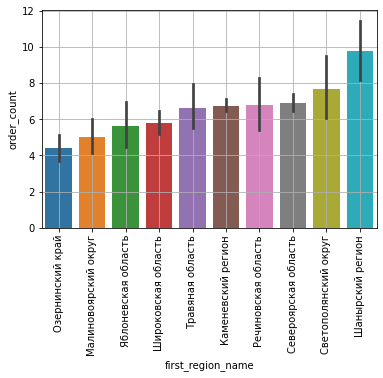

In [114]:
sns.barplot(data = user_profile[user_profile['first_region_name'].isin(top_region)],
           x = 'first_region_name',
           y = 'order_count',
           order = region_order)

plt.grid()
plt.xticks(rotation =  90)
plt.show()

Регион проведения мероприятие умеренно влияет на количество заказов пользователей. В отдельных регионах среднее число заказов выше, но в целом различия указывают на наличие слабой корреляции.  

### 5. Общий вывод и рекомендации

В конце проекта напишите общий вывод и рекомендации: расскажите заказчику, на что нужно обратить внимание. В выводах кратко укажите:

- **Информацию о данных**, с которыми вы работали, и то, как они были подготовлены: например, расскажите о фильтрации данных, переводе тенге в рубли, фильтрации выбросов.
- **Основные результаты анализа.** Например, укажите:
    - Сколько пользователей в выборке? Как распределены пользователи по числу заказов? Какие ещё статистические показатели вы подсчитали важным во время изучения данных?
    - Какие признаки первого заказа связаны с возвратом пользователей?
    - Как связаны средняя выручка и количество билетов в заказе с вероятностью повторных покупок?
    - Какие временные характеристики влияют на удержание (день недели, интервалы между покупками)?
    - Какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок согласно результатам корреляционного анализа?
- Дополните выводы информацией, которая покажется вам важной и интересной. Следите за общим объёмом выводов — они должны быть компактными и ёмкими.

В конце предложите заказчику рекомендации о том, как именно действовать в его ситуации. Например, укажите, на какие сегменты пользователей стоит обратить внимание в первую очередь, а какие нуждаются в дополнительных маркетинговых усилиях.

### Информация о данных
После проведения предобработки данных в датафрейме 15 столбоцов было 14, 287786 строк из 290611. 
Дубликаты не были найдены.  Строки были отфильтрованы по выбросам в столбце `revenue_rub`.

Для оптимизации работы с данными в датафрейме были сделаны такие изменения типов данных:
- `tickets_count` - int8
- `order_dt` - используется datetime64[ns] с меньшей точностью

Всего было обнаружено столбцов с пропущенными значениями 1 из 15: `days_since_prev`. 

Чтобы не было искажений в данных пропуски не заполнялись.

Данные были проверены на явные и неявные дубликаты - в данных они не были обнаружены.

Также были добавлены новые столбцы в датафрейм:
- `revenue_rub` - выручка от заказа в российских рублях.

Был проведен анализ на выбросы в столбцах: `tickets_count` и `revenue_rub`. После чего данные были отфильрованы по обнаруженным выбросам в поле `revenue_rub`.

Был создан профиль пользователя - `user_profile`. В котором было 21854 строк и 13 столбцов. 

Были изучены статистические показатели по общему числу заказов: 
- Было не много пользователей, которые совершили за весь период больше 2000 заказов, они выглядят как выбросы, так как встречаются на много реже относитльно общего количества.
- Данные были отфильтрованы по 99-му процентилю.

Во время ИАД были добалвены столбцы:
- `tickets_segment` - сегменты по среднему количеству билетов в заказе:
    - от 1 до 2 билетов;
    - от 2 до 3 билетов;
    - от 3 до 5 билетов;
    - от 5 и более билетов.
- `first_day` - указывает на день недели первого заказа пользователя (0 - понедельник, 6 - воскресенье)
- `orders_segment` - сегменты пользователей по полю `order_count`. Cегменты:
    - 1 заказ;
    - от 2 до 4 заказов;
    - от 5 и выше.

### Основные результаты анализа.

- Общее число пользователей в выборке после фильтрации: **21638**
- Доля пользователей совершивших 2 и более заказа после фильтрации: **0.61**
- Доля пользователей совершивших 5 и более заказа после фильтрации: **0.28**

**Общий профиль клиента банка**

Исследовательский анализ данных позволил сформировать профиль возвращающегося клиента.

Чаще всего возвращаются за покупкой билетов на:
- выставку (64%)
- театр (63%)
- концерты (61%)

Больше всего пользователи покупают у:
- Билеты без проблем - 24%
- Мой билет - 14%
- Лови билет! - 13%
- Билеты в руки - 12%
- Облачко - 10%

В Каменевском регионе больше всего пользователей, возвращаются туда - `62%`. В Североярской области тоже больше пользователей относительно общей массы и туда возвращаются - `64%` пользователей. На третьем месте по количеству пользователей Широковская область, в которую возвращаются - `65%` пользователей. 

Пользователи совершившие 1 заказ сконцентрированы в диапозоне 0-300 российских рублей. Что является низкой средней выручкой. Пользователи совершившие 2 и более заказов сконцентрированы 400-800 рублей. 

Основная масса пользователей, которые возвращаются в среднем покупают за раз по 2-3 билета. Более 4 билетов покупаются уже редко. Максимальное среднее количество билетов за раз - 11, а минимально - 1. Пользователи с большим средним количеством билетом обычно покупают билеты для семьи, компании, что может быть связано с повторными покупками.

Больше всего доля вернувшихся пользователей по: 
- Понедельникам - `63%`
- Субботам - `63%`

- По понедельникам пользователи могут заказывать билеты на последующую неделю, а также рассылки от кампаний на неделю, что может являться причиной небольшого прироста возвратов.
- По субботам пользователи могут заказывать больше билетов, так как по сравнению с будними днями есть больше свободного времени на просмотр мероприятий. 

Пользователи распределены не равномерно. Это может зависеть также от количества проводимых мероприятий в регионах, так как некоторые компании предоставляют билеты в определенные регионы. Также операторы могут проводить акции для привлечения пользоватей.

**Точками входа по регионам можно считать регионы с большим количеством пользователей**, так как у них будет большее количество возвратов даже при той же доле, что и в регионах с 500 и меньше пользователями.

**Среднее время между заказами влияет на возвращение пользователя.** Пользователи с меньши интервалом чаще совершают повторные покупки и формируют сегмент `5 и более` заказов. 

Характеристики первого заказа и профиля пользователя, которые связаны с числом покупок согласно результатам корреляционного анализа: 
- Средняя выручка от заказа имеет умеренно положительную корреляцию с числом заказов, так как чем больше заказов, тем выше медиана средней выручки от заказа. Также у сегмента `1 заказ` больше разбросов, хоть там есть значения выше, они являются разовыми. В то время, когда у 5 и более заказов более стабильные выручки.
- Чем больше заказов, тем меньше интервал в днях между заказами. Связь между заказами и интервалом дней между ними есть.
- Среднее количество билетов отличается между сегментами по числу заказов. Что говорит об умеренной корреляции.
- Регион проведения мероприятие умеренно влияет на количество заказов пользователей. В отдельных регионах среднее число заказов выше, но в целом различия указывают на наличие слабой корреляции.

### Рекомендации

В качестве рекомендациий стоит обратить внимание на пользователей со средним количеством заказов, так как пользователи с 5 и более заказами являются постоянными пользователями, в то время как 2-4 является переходным сегментом, который требует больше внимания для удержания. 

### 6. Финализация проекта и публикация в Git

Когда вы закончите анализировать данные, оформите проект, а затем опубликуйте его.

Выполните следующие действия:

1. Создайте файл `.gitignore`. Добавьте в него все временные и чувствительные файлы, которые не должны попасть в репозиторий.
2. Сформируйте файл `requirements.txt`. Зафиксируйте все библиотеки, которые вы использовали в проекте.
3. Вынести все чувствительные данные (параметры подключения к базе) в `.env`файл.
4. Проверьте, что проект запускается и воспроизводим.
5. Загрузите проект в публичный репозиторий — например, на GitHub. Убедитесь, что все нужные файлы находятся в репозитории, исключая те, что в `.gitignore`. Ссылка на репозиторий понадобится для отправки проекта на проверку. Вставьте её в шаблон проекта в тетрадке Jupyter Notebook перед отправкой проекта на ревью.

**Вставьте ссылку на проект в этой ячейке тетрадки перед отправкой проекта на ревью.**